In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Datasets/Pizza Party Sales.csv')

# Informe EDA (Exploratory Data Analysis)

**Valores nulos:** Gracias a la información del dataframe podemos ver que este **no contiene nulos**. 

**Tipo de datos:** Seis de las siete columnas son de tipo *'object'*, mientras que la restante es de tipo *'float64'*.

In [3]:
# Obtengo información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49574 non-null  object 
 1   date    49574 non-null  object 
 2   time    49574 non-null  object 
 3   name    49574 non-null  object 
 4   size    49574 non-null  object 
 5   type    49574 non-null  object 
 6   price   49574 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


##### **Primera visualización del Dataframe**

**Formato de los dato:** La columna **id** cuenta con el año del pedido primero y luego un número identificatorio de seis dígitos (*AAAA-000000*). La columna **date** tiene un formato de fecha de día/mes/año (*DD/MM/AAAA*).La columna **time** tiene un formato de hora:minutos:segundos (*HH:MM:SS*). La columna **name** contiene una abreviatura del nombre de la pizza. La columna *size* contiene la medida de la pizza representado con una letra (Ej. M = 'Medium'). La columna **type** contiene la variedad de la pizza. La columna **price** contiene el precio final de la venta representado con un valor de tipo *flotante*.

In [13]:
# Obtengo cinco datos al azar del dataframe
df.sample(5)

,id,date,time,name,size,type,price
39727,2015-017171,18/10/2015,13:05:09,hawaiian,L,classic,16.50
17744,2015-007656,09/05/2015,13:10:51,the_greek,XL,classic,25.50
30755,2015-013326,10/08/2015,19:41:10,spinach_fet,M,veggie,16.00
35158,2015-015228,11/09/2015,22:02:02,southw_ckn,S,chicken,12.75
10833,2015-004656,19/03/2015,20:43:33,spin_pesto,S,veggie,12.50


**Duplicados en la columna 'id':** La columna *'id'* no tiene un valor único por cada fila; cada fila corresponde a uno de los productos vendidos, si en una misma venta se vende más de un producto entonces serán registradas en filas diferentes con un mismo identificador compartido. Para saber si realmente hay valores duplicados en la columna *'id'* deberemos corroborarlo en base a datos con un mismo id, pero con diferentes horas. Así podemos corroborar que no existen valores duplicados en este dataset.

In [21]:
# Obtengo los duplicados de la columna 'id'
df[df.duplicated('id', keep=False)].head(5)

,id,date,time,name,size,type,price
1,2015-000002,01/01/2015,11:57:40,classic_dlx,M,classic,16.00
2,2015-000002,01/01/2015,11:57:40,mexicana,M,veggie,16.00
3,2015-000002,01/01/2015,11:57:40,thai_ckn,L,chicken,20.75
4,2015-000002,01/01/2015,11:57:40,five_cheese,L,veggie,18.50
5,2015-000002,01/01/2015,11:57:40,ital_supr,L,supreme,20.75


In [22]:
# Obtengo los duplicados de la columa 'id' filtrando por la columna 'time'
duplicados = df.groupby('id').filter(lambda x: x['time'].nunique() > 1)
duplicados

,id,date,time,name,size,type,price


**Horario con más ventas:** En el siguiente histograma se muestra las ventas totales del dataset filtradas por la hora en la que se realizó la transacción. Podemos ver que entre las 11hs y las 13hs es el período con más ventas, seguido por el lapso de las 15:30hs y las 16:30hs.
Hay que tener en cuenta que este gráfico toma las ventas totales del dataset, por lo que, si algún día o días tiene un mayor volúmen de ventas que los otros, puede estar condicionando el informe.

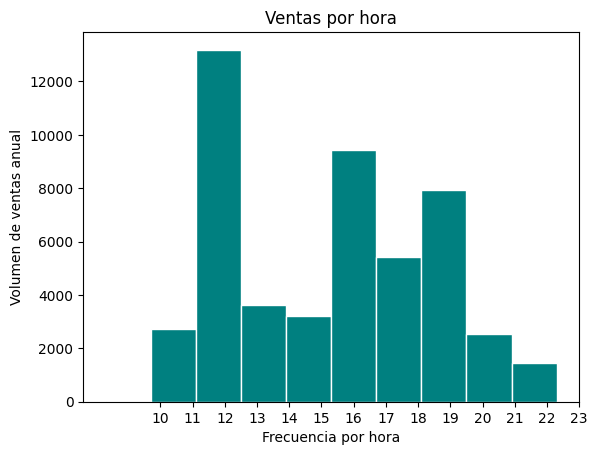

In [6]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M')                      # Convierto la columna 'time' a datetime

plt.hist(df['time'].dt.hour, edgecolor='white', align='left', color='teal')   # Utilizo las horas de la columna 'time' para obtener el volumen de ventas anual

plt.title('Ventas por hora')                                    # Título

plt.ylabel('Volumen de ventas anual')                           # Etiqueta del eje Y
plt.xlabel('Frecuencia por hora')                               # Etiqueta del eje X

plt.xticks(range(10,24))                                        # Fijo el marco horario que se debe mostrar
plt.show()                                                      # Enseño el gráfico

**Outliers en la columna Date:** Para saber si hay Outliers en algún mes o día en específico, generé una cuadrícula con doce Boxplots, uno por cada mes. Posteriormente, si es necesario, haré lo mismo para los días del mes de interés.

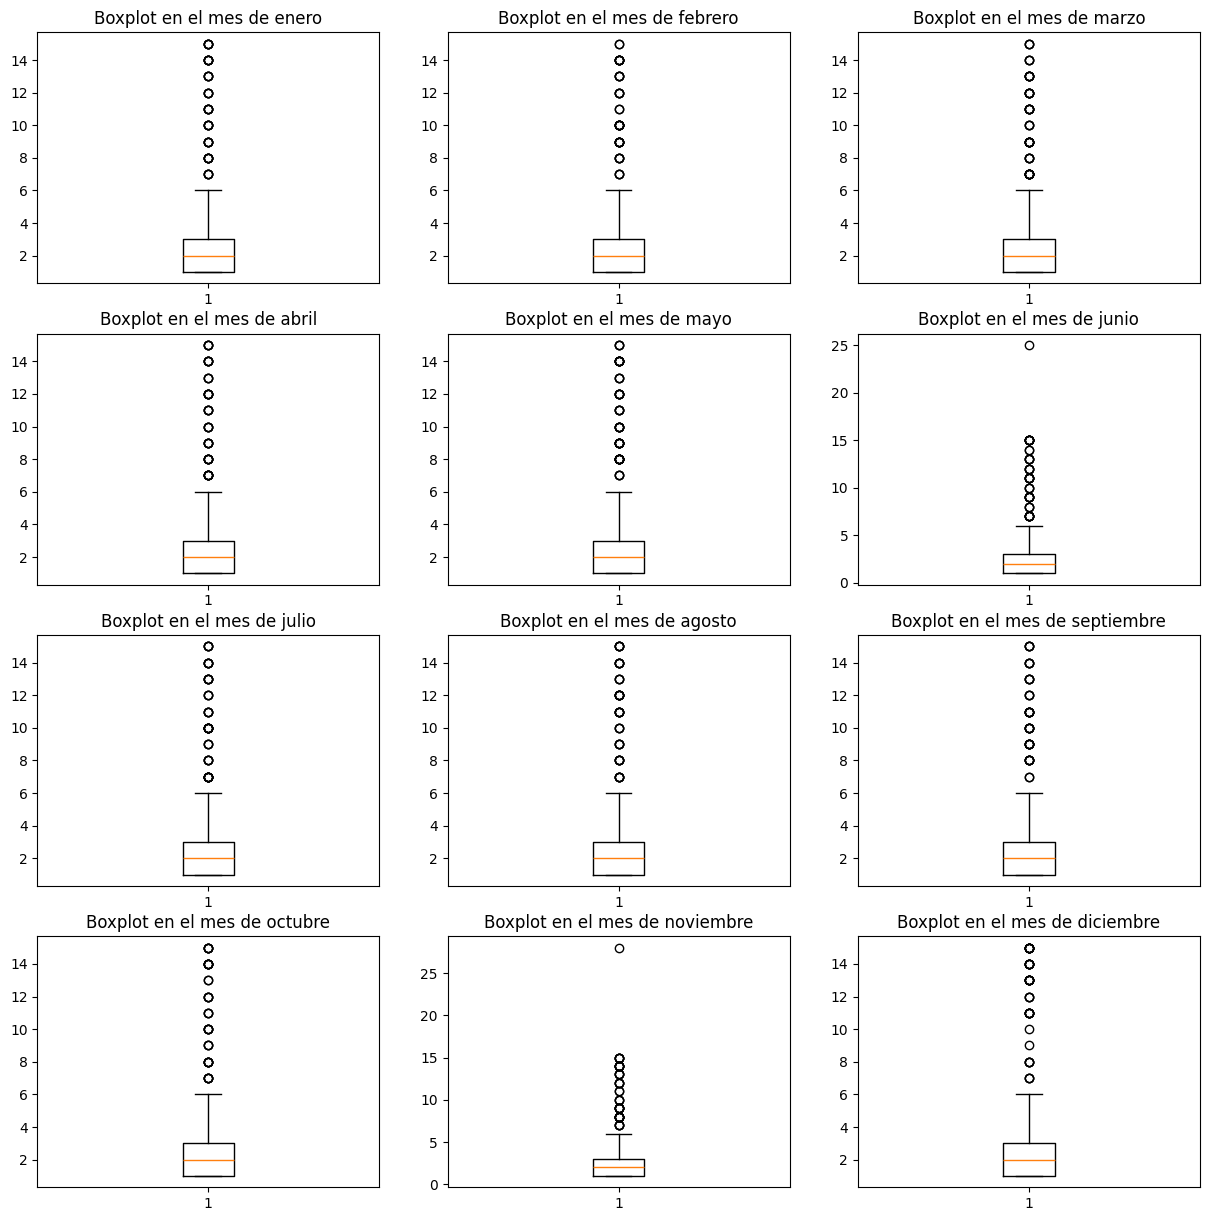

In [12]:
# Transformo la columna 'date' a tipo datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Creo un contador que será utilizado para los meses
contador = 1

# Creo una lista con los nombres de los meses
nombres_meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Creo una cuadrícula de gráficos de Boxplot
fig,axs = plt.subplots(4,3, figsize=(15,15))

# Los valores 'x' e 'y' serán usados cómo ejes de la cuadrícula
for x in range(4):
        for y in range(3):
            
            # Creo un condicional por el contador
            if contador <= 12:
                
                meses = df[df['date'].dt.month == contador] # meses es un dataframe donde se guardarán los registros del mes que corresponda con contador (ej. contador = 1, meses = enero)
                valores = meses['id'].value_counts()        # Cuento los valores de la columna 'id' del dataframe meses
                valores = valores.to_list()                 # Transformo los valores contados a lista
                
                axs[x,y].boxplot(valores)                                                  # Creo el gráfico            
                axs[x,y].set_title(f'Boxplot en el mes de {nombres_meses[contador - 1]}')     # Cambio el título al gráfico
                
                contador += 1

plt.show() # Enseño el gráfico


**Producto más vendido:**

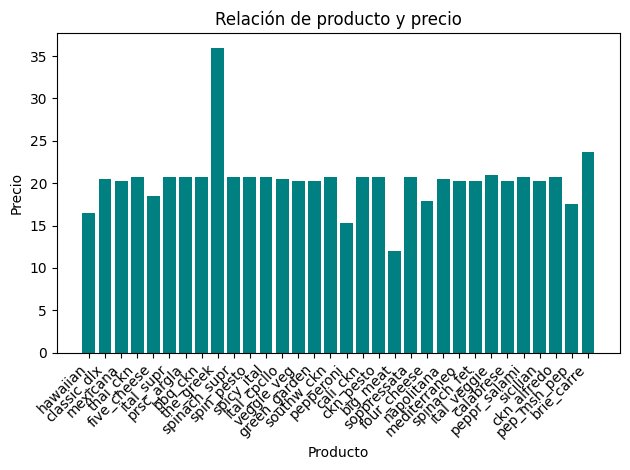

In [8]:
fig, ax = plt.subplots()
ax.bar(df['name'],df['price'], color='teal')    # Uso la columna 'name' para obtener los productos y la columna 'price' para los precios

# Etiquetas
ax.set_xlabel('Producto')
ax.set_ylabel('Precio')
ax.set_title('Relación de producto y precio')

plt.xticks(rotation=45, ha='right')     # Roto los nombres de los productos para que se visualicen mejor

plt.tight_layout()      # Ajusto el diseño para evitar el recorte de etiquetas
plt.show()